Pytorch computer vision

Ref github page : https://github.com/mrdbourke/pytorch-deep-learning

Computer vision libraries
- Torchvision
- torchvision.models,
- torchvisio.transforms
- torch.utils.data.Dataset - Base dataset class for pytorch]

- torch.utils.data.DataLoader - Creates python iterable over a dataset




In [1]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#check versio 
print(torch.__version__)
print(torchvision.__version__)



1.13.1+cu116
0.14.1+cu116


Getting Datasets
- Fashion MNIST from torchvision.datasets

In [2]:
#Set up training data and test data
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root="data",
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
#Se the first training sample
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_indx= train_data.class_to_idx
class_to_indx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
#check shape of image
image , label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

Visualizing samples of data

Text(0.5, 1.0, '9')

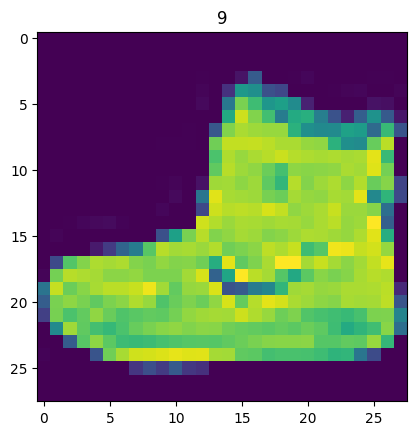

In [8]:
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

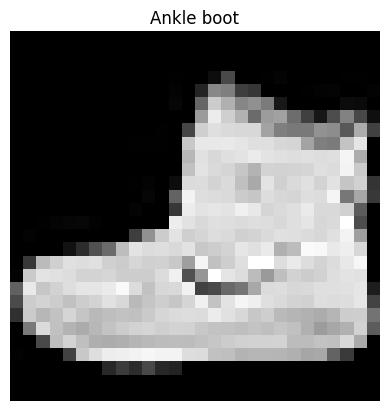

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

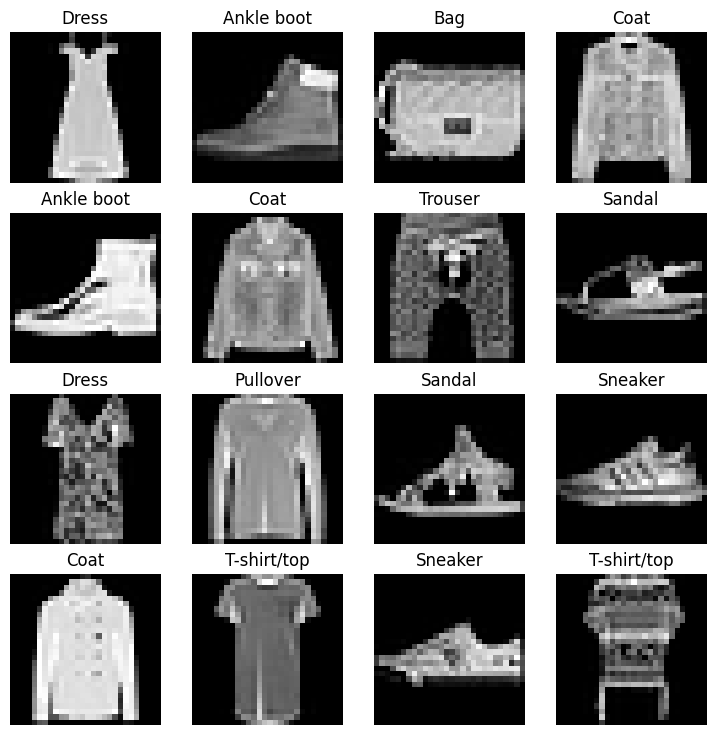

In [10]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


Prepariing data loader

- Dataloader turns dataset into python iterable
- Turning data into batches and minibatches

In [11]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
from torch.utils.data import DataLoader
 #set up batch size hyperparameter
BATCH_SIZE = 32

#tURn dataset into python iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True )
test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=False)

In [13]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8a5506cd30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8a5506cdf0>)

In [14]:
#Cheking out dataloader
print(f'Dataloader: {train_dataloader,test_dataloader}')
print(len(train_dataloader))
print(len(test_dataloader))

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7f8a5506cd30>, <torch.utils.data.dataloader.DataLoader object at 0x7f8a5506cdf0>)
1875
313


In [15]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image szie : torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


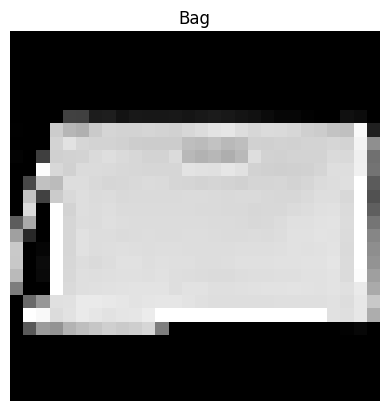

In [16]:
#Show a smaple 
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Image szie : {img.shape}')
print(f'Label: {label}, label size: {label.shape}')


Baseline model

In [17]:
#createn a flattend layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]
#flatten sample
output = flatten_model(x)
x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [18]:
28 * 28

784

In [19]:
class FashionMnist(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_unit),
        nn.Linear(in_features=hidden_unit,out_features=output_shape)
        )
    
  def forward(self,x):
    return self.layer_stack(x)

In [22]:
#set up model instance
torch.manual_seed(42)
model_0 = FashionMnist(input_shape=28 * 28,
                       hidden_unit=10,
                       output_shape=len(class_names))
model_0.to(device)
model_0

FashionMnist(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

RuntimeError: ignored

Set up loss function, optimizer and metric

In [26]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("Helper_function.py already exists , skipping download.....")
else:
  print("Downlaoding helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions","wb") as f:
    f.write(request.content)

Downlaoding helper_functions.py


In [27]:
#loss function and optmizer
#import accuracy metric
import helper_functions
from helper_functions import accuracy_fn
#set up loss fucntion and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

Wrting function to time experiment

In [28]:
#Writing functin to time experiment 
from timeit import default_timer as timer
def print_train_time(start:float,end:float,
                     device:torch.device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [29]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


6.314899997050816e-05

In [30]:
len(train_dataloader)

1875

Creating a training loop and training a model on batches of data

In [31]:
#import tqdm for progress abr
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()
epochs = 4

#create trainign and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------------")

  #Traning
  train_loss = 0
  #Add loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):
    X , y = X.to(device), y.to(device)
    model_0.train()
    #forward pass
    y_pred = model_0(X)

    #Calculate loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumalate train loss

    #optimize zero gard

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print whats happening

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  #Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  #Testing 
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test, y_test = X_test.to(device),y_test.to(device)
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred,y_test)

      #Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    #Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)
  print(f"\nTrain loss:{train_loss:.4f} | Test loss: {test_loss:.4f},Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
----------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.5904 | Test loss: 0.5095,Test acc: 82.0387
Epoch: 1
----------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4763 | Test loss: 0.4799,Test acc: 83.1969
Epoch: 2
----------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4550 | Test loss: 0.4766,Test acc: 83.4265
Epoch: 3
----------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4425 | Test loss: 0.4631,Test acc: 83.7460
Train time on cuda:0: 59.177 seconds


Evakuating model performance

In [32]:
#Make predictions and get model_0 results
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,device=device):
  loss , acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device),y.to(device)
      #Make predictions
      y_pred = model(X)

      #Accumulate loss and accuracy per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model_0,
                                 data_loader=test_dataloader,
                                 loss_fn = loss_fn,
                                 accuracy_fn = accuracy_fn,
                                 device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnist',
 'model_loss': 0.4630562663078308,
 'model_acc': 83.74600638977635}

Training same model on GPU

In [33]:
#Set up device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"

In [34]:
#Creating model
class FashionMNISTmodel2(nn.Module):
  def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

In [35]:
#Create instance of model
torch.manual_seed(42)
model_2 = FashionMNISTmodel2(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)
                             ).to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [36]:
#Instantiate loss function and optimizer and evaluation functions
#loss function and optmizer
#import accuracy metric
import helper_functions
from helper_functions import accuracy_fn
#set up loss fucntion and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [37]:
type(optimizer)

torch.optim.sgd.SGD

Functionizing training and test loop

In [38]:
#import tqdm for progress abr
from tqdm.auto import tqdm

torch.manual_seed(42)

#create trainign and test loop
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device =device
               ): 
  
  train_loss, train_acc = 0,0
  #put model in training mode
  model.train()
  for batch,(X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    #forward pass
    y_pred = model(X)

    #Calculate loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumalate train loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #optimize zero gard
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print whats happening
  #Divide total train loss by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss {train_loss:.5f} | train acc {train_acc:.2f}%")

In [39]:
def test_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn,
    device:torch.nn.Module = device):
  test_loss, test_acc = 0,0

  
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #send data to target device
      X, y = X.to(device), y.to(device)

      #Forward pass

      test_pred = model(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [40]:
torch.manual_seed(42)
#Measure time for training and testing
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
#Create optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
             device = device
             )
  
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
train_time_end = timer()
total_train_time_mode_2 = print_train_time(start=train_time_start_on_gpu,
                                           end = train_time_end,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss 1.09199 | train acc 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------------
Train loss 0.78101 | train acc 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------------
Train loss 0.67027 | train acc 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 36.021 seconds


In [41]:
#Get model 2 evaluation results
model_2_results = eval_model(model=model_2,
                                 data_loader=test_dataloader,
                                 loss_fn = loss_fn,
                                 accuracy_fn = accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodel2',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

Model 2 : Building convoluational neural networks

Link: cnn explainer website


In [42]:
#Creating cnn model
class FashionMnistmodel3(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
                  nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size = 3,
            stride=1,
            padding = 1

        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1

        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units * 7 * 7,
            out_features = output_shape
        )
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [43]:
#instantiate model
torch.manual_seed(42)
model_3 = FashionMnistmodel3(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)

).to(device)

In [44]:
#Set up loss function and optmizer
#loss function and optmizer
#import accuracy metric
import helper_functions
from helper_functions import accuracy_fn
#set up loss fucntion and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [45]:
torch.manual_seed(42)
#Measure time for training and testing
from timeit import default_timer as timer
train_time_start_on_gpu_model_3 = timer()

epochs = 3
#Create optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------------")
  train_step(model=model_3,
             data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
             device = device
             )
  
  test_step(model=model_3,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
train_time_end = timer()
total_train_time_mode_3 = print_train_time(start=train_time_start_on_gpu_model_3,
                                           end = train_time_end,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss 0.59282 | train acc 78.56%
Test loss: 0.39108 | Test acc: 85.97%

Epoch: 1
-------------
Train loss 0.36266 | train acc 86.95%
Test loss: 0.35403 | Test acc: 86.78%

Epoch: 2
-------------
Train loss 0.32331 | train acc 88.33%
Test loss: 0.33084 | Test acc: 88.26%

Train time on cuda: 49.690 seconds


In [46]:
#Get model_3 results 
model_3_results = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistmodel3',
 'model_loss': 0.3308432996273041,
 'model_acc': 88.25878594249201}

Comparing model results

In [47]:
import pandas as pd
compare_res = pd.DataFrame([model_0_results,model_2_results,model_3_results])

In [48]:
compare_res.head()

,model_name,model_loss,model_acc
0,FashionMnist,0.463056,83.746006
1,FashionMNISTmodel2,0.685001,75.019968
2,FashionMnistmodel3,0.330843,88.258786


In [49]:
#Adding training time to model comparison
compare_res["training_time"] = [total_train_time_model_0,total_train_time_mode_2,total_train_time_mode_3]

In [50]:
compare_res.head()

,model_name,model_loss,model_acc,training_time
0,FashionMnist,0.463056,83.746006,59.176595
1,FashionMNISTmodel2,0.685001,75.019968,36.020600
2,FashionMnistmodel3,0.330843,88.258786,49.689769


Making and evaluation random predictions with best model

In [51]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  preds_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=1).to(device)

      #Forward pass model logits

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #Get pred prob off GPU
      preds_probs.append(pred_prob.cpu())
  return torch.stack(preds_probs)


In [52]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)



In [53]:
#Make prediction
preds_probs = make_predictions(model=model_3,
                               data=test_samples)
preds_probs

tensor([[1.8093e-04, 4.8697e-05, 1.0085e-04, 4.8023e-05, 7.2589e-05, 2.0122e-03,
         4.6939e-05, 9.4189e-01, 2.1704e-03, 5.3433e-02],
        [3.3058e-04, 1.1962e-04, 5.0031e-04, 4.4569e-04, 2.7966e-05, 8.8142e-03,
         1.4786e-04, 8.0429e-01, 2.2167e-03, 1.8311e-01],
        [5.0184e-03, 5.0164e-05, 4.8117e-03, 3.7451e-03, 7.7313e-02, 1.4668e-02,
         2.8487e-03, 1.6672e-03, 8.8976e-01, 1.1466e-04],
        [7.9022e-03, 7.6295e-04, 5.5289e-04, 9.8144e-01, 5.5762e-04, 2.7346e-05,
         8.7435e-03, 3.3864e-06, 8.6714e-06, 1.0635e-06],
        [9.2014e-05, 1.5853e-05, 4.0488e-05, 8.6363e-05, 7.4423e-05, 3.7931e-03,
         1.6072e-04, 5.8152e-01, 3.4328e-02, 3.7989e-01],
        [5.9501e-01, 6.7004e-04, 5.5450e-02, 1.4558e-01, 3.5366e-03, 1.8415e-03,
         1.9385e-01, 2.0784e-03, 1.4898e-03, 4.9401e-04],
        [5.6601e-04, 1.8154e-05, 1.9634e-02, 1.2182e-04, 9.3399e-01, 2.4756e-06,
         4.4073e-02, 5.1774e-06, 1.5862e-03, 3.2376e-06],
        [2.6494e-06, 2.9801

In [54]:
#Convert predictions probability to labels
pred_classes = preds_probs.argmax(dim=1)
pred_classes

tensor([7, 7, 8, 3, 7, 0, 4, 9, 8])

In [55]:
test_labels

[7, 7, 8, 3, 9, 0, 4, 9, 8]

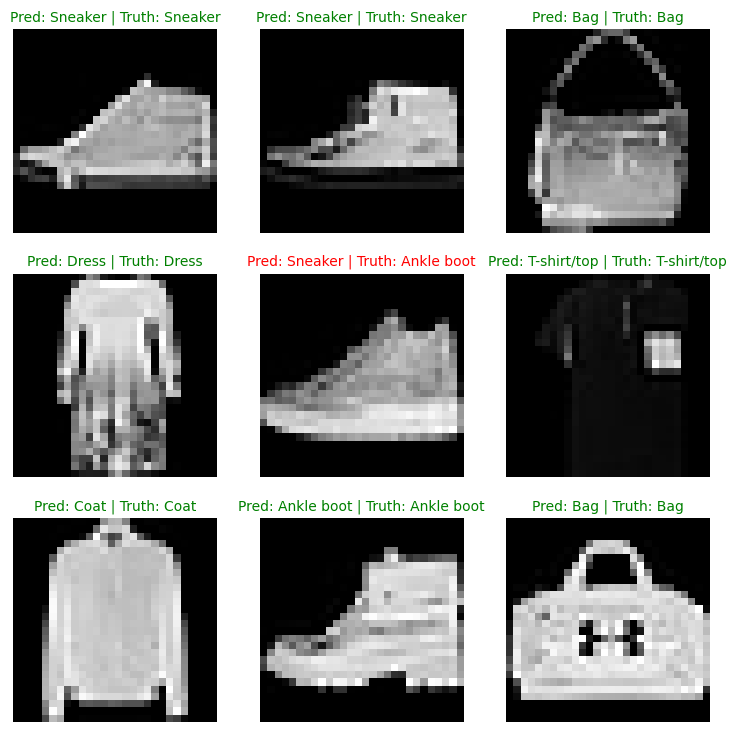

In [56]:
#Plot predictions
plt.figure(figsize=(9,9))
rows = 3
cols = 3
for i,sample in enumerate(test_samples):
  plt.subplot(rows,cols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)


In [57]:
#Making a confusion matrix for prediction evaluation and make plot 
import mlxtend
from tqdm.auto import tqdm
y_preds = []
model_3.eval()
with torch.inference_mode():
  for X ,y in tqdm(test_dataloader,desc="Making predictions------"):
    X,y = X.to(device),y.to(device)
    y_logit = model_3(X)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions------:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [58]:
len(y_pred_tensor)

10000

In [59]:
 print(f"mlxtend version:{mlxtend.__version__}")

mlxtend version:0.21.0


In [60]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend should be 0.19 or higher"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version:0.21.0


In [68]:
import mlxtend  
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting  import plot_confusion_matrix

In [73]:
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[631,   7,  40,  72,  11,   0, 228,   0,  11,   0],
        [  8, 885,   8,  75,  14,   0,   6,   0,   3,   1],
        [  7,   2, 804,  16,  93,   0,  75,   0,   3,   0],
        [ 29,  15,  25, 852,  31,   0,  42,   0,   5,   1],
        [  4,   7, 107,  55, 716,   0, 105,   0,   6,   0],
        [  3,   2,   8,   7,   2, 835,   5,  45,  72,  21],
        [ 69,   6, 122,  64,  95,   0, 631,   0,  13,   0],
        [  1,   1,   0,   0,   0,  29,   0, 880,  16,  73],
        [  3,   2,  13,  20,  11,   9,  34,   5, 902,   1],
        [  0,   1,   1,   3,   0,  19,   3,  61,  11, 901]])

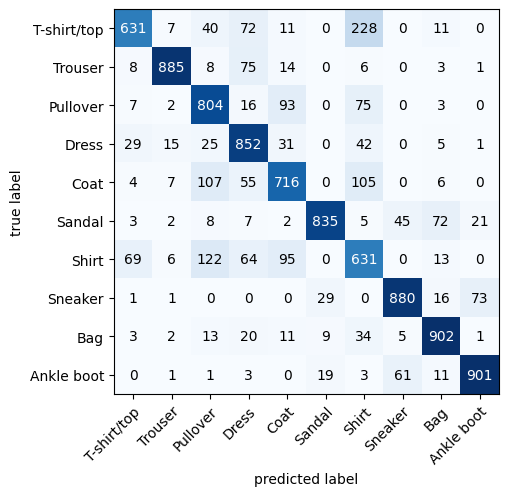

In [77]:
#plot confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(5,5))


Saving and loading best trained model

In [78]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True,
                 exist_ok=True)
#Create model save path
model_name = "03_cv_model_3.pth"
model_save_path = model_path/model_name
model_save_path


PosixPath('models/03_cv_model_3.pth')

In [79]:
#Save model state dict
print(f"Saving model")
torch.save(obj=model_3.state_dict(),
           f=model_save_path)

Saving model


In [80]:
#Load model
torch.manual_seed(42)
loaded_model_3 = FashionMnistmodel3(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))
loaded_model_3.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [81]:
loaded_model_3.to(device)

FashionMnistmodel3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [82]:
#Evaluate loaded model
model_3_results

{'model_name': 'FashionMnistmodel3',
 'model_loss': 0.3308432996273041,
 'model_acc': 88.25878594249201}

In [83]:
#Evaluate loaded model 3
torch.manual_seed(42)

loaded_model_3_results = eval_model(
    model=loaded_model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistmodel3',
 'model_loss': 0.3308432996273041,
 'model_acc': 88.25878594249201}

In [ ]:
#Check model comparison 
torch.isclose(torch.tensor(model_3_results["model_loss"]),
              torch.tensor(loaded_model_3_results["model_loss"]),
              atol=1e-02)

In [61]:
#Trying out random image
img_rand = torch.randn(size=(1,28,28)).to(device)
img_rand.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [62]:
model_3(img_rand.unsqueeze(dim=1))

tensor([[ 4.5853, -0.4559,  0.1669,  0.4882, -1.0636,  1.4219, -1.4772,  0.2322,
          2.3367, -7.6564]], device='cuda:0', grad_fn=<AddmmBackward0>)

Stepping through conv 2d

In [63]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image= images[0]
print(f"image batch shape:{images.shape}")
print(f"Test imag shape: {test_image.shape}")

image batch shape:torch.Size([32, 3, 64, 64])
Test imag shape: torch.Size([3, 64, 64])


In [64]:
#Create single cnv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size = 3,
    stride = 1,
    padding = 0
)
#Pass data through conv layer
conv_output = conv_layer(test_image.unsqueeze(0)
    
)

Stepping through maxpool2d

In [65]:
test_image.shape

torch.Size([3, 64, 64])

In [66]:
print(f"Test image original shape {test_image.shape}")
print(f"Test image without unsqueezed dimension:{test_image.unsqueeze(0).shape}")

Test image original shape torch.Size([3, 64, 64])
Test image without unsqueezed dimension:torch.Size([1, 3, 64, 64])


In [67]:
max_pool = nn.MaxPool2d(
    kernel_size =2
)
test_image_after_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_after_conv.shape}")

#Pass data through max pool layer
test_image_max_pool = max_pool(test_image_after_conv)

print(f"Shape after conv and max pool {test_image_max_pool.shape}")


Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after conv and max pool torch.Size([1, 10, 31, 31])
